# Assignment 1, 2 & 3 #

For this assignment, we are going to explore data from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study (Links to an external site.) in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.

The data were simulated from the actual data to conform to the GDPR law.

In [25]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

import numpy as np
import matplotlib.pyplot as plt # Useful to include matplotlib when plotting with Seaborn, because Seaborn is built on it.
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data cleaning ##

In [26]:
df1 = pd.read_csv('steps.csv', sep=';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [28]:
df = pd.merge(df1, df2, on = 'id') #'app' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [29]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to weight
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


In [30]:
df['age'].value_counts() #Get all the values. This may be less useful when there are many values.

25-34    426
35-44    178
45-54    147
<25      125
55-64     46
65+        7
Name: age, dtype: int64

In [31]:
df['mean'] = df.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


The median mean steps is: 6245.006060606061 MB
The mean mean steps is: 7036.627484984338 MB


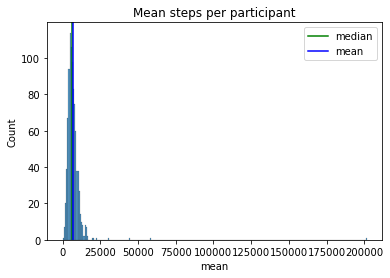

In [32]:
mean_size = df['mean'].mean()
median_size = df['mean'].median()

print(f'The median mean steps is: {median_size} MB')
print(f'The mean mean steps is: {mean_size} MB')

sns.histplot(df['mean'], kde=False)
plt.title('Mean steps per participant')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

In this graph it is visible that there are some impossible values, so let's delete those.

In [33]:
df = df[df['mean'] <= 30000]

In [50]:
df = df[df['weight'] <= 200]

## Exploratory data analysis ##

The median mean steps is: 6242.465088282504 MB
The mean mean steps is: 6705.682107937451 MB


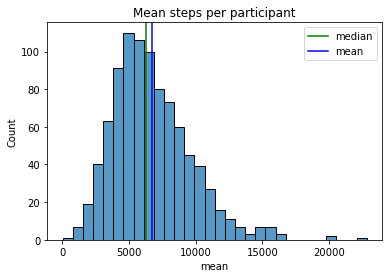

In [51]:
mean_size = df['mean'].mean()
median_size = df['mean'].median()

print(f'The median mean steps is: {median_size} MB')
print(f'The mean mean steps is: {mean_size} MB')

sns.histplot(df['mean'], kde=False)
plt.title('Mean steps per participant')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

/Users/robintwigt/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


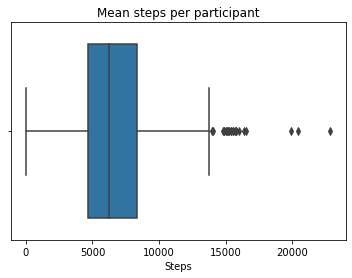

In [52]:
sns.boxplot(df['mean'])
plt.title('Mean steps per participant')
plt.xlabel('Steps')
plt.show()

/Users/robintwigt/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/robintwigt/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/robintwigt/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


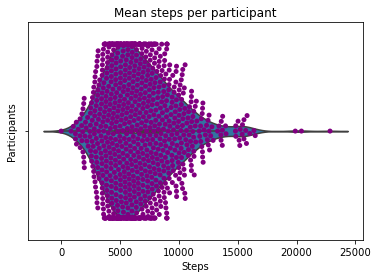

In [53]:
sns.violinplot(df['mean'])
sns.swarmplot(df['mean'], color='purple') #default color doesn't stand out
plt.title('Mean steps per participant')
plt.ylabel('Participants')
plt.xlabel('Steps')
plt.show()

Text(0.5, 1.0, 'Mean steps per gender')

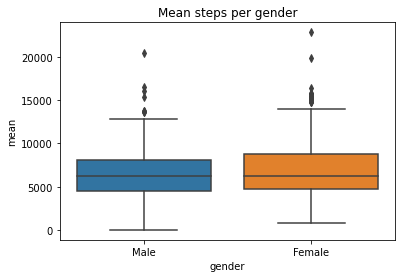

In [54]:
plt.figure()
sns.boxplot(x='gender', y='mean', data=df)
plt.title('Mean steps per gender')

When we look at these results we can conclude that females have a higher amount of mean steps.

Text(0.5, 1.0, 'Mean steps per age')

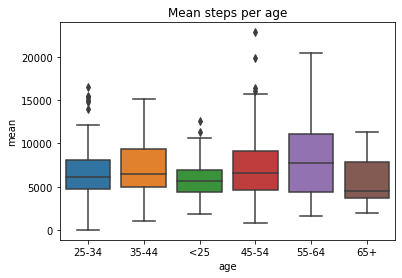

In [55]:
plt.figure()
sns.boxplot(x='age', y='mean', data=df)
plt.title('Mean steps per age')

When we look at these results we can conclude that people between 55-64 years old have the highest amount of mean steps.

## Correlation ##

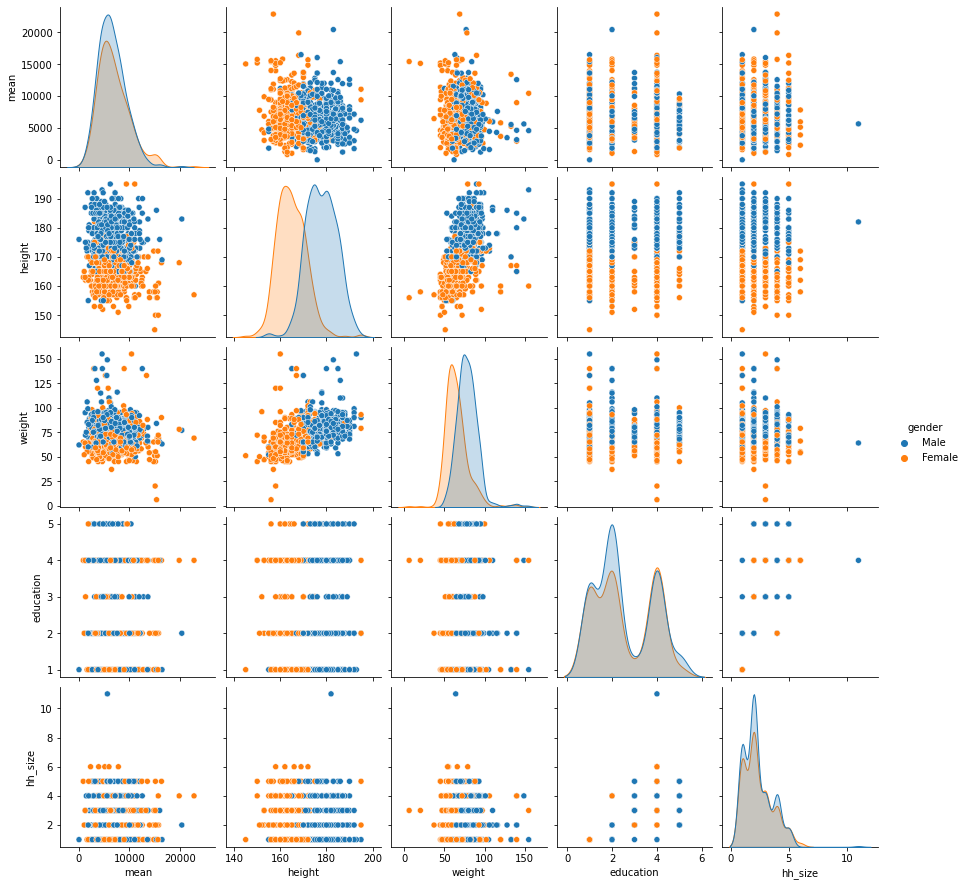

In [56]:
# Subset of the variables with the best correlations
dfsubset1 = df[['mean', 'gender', 'height', 'weight', 'education', 'hh_size']]
sns.pairplot(dfsubset1, hue="gender", diag_kind="kde")
plt.show()

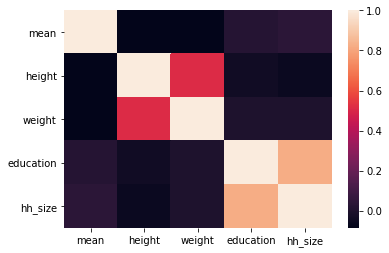

In [57]:
corr = df[['mean', 'age', 'height', 'weight', 'education', 'hh_size']].corr() #I'm leaving out the corrected variables (divided by 1 million)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

## Predictive model ##

Lineair regression = you can see the average increase/decrease of a variable.

In [61]:
df['weight_m'] = df['weight']
df['mean_b'] = df['mean']

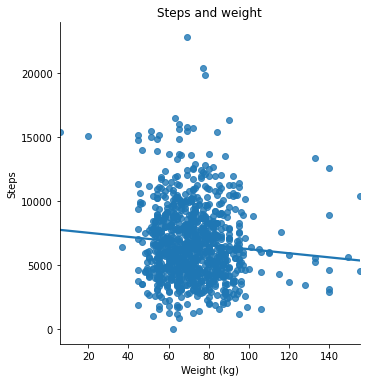

In [62]:
sns.lmplot(x='weight_m', y='mean_b', data=df, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.title('Steps and weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Steps')
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['weight_m']] 
y = df['mean_b']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

The regression line is equal to y = 7862.379 + -16.027X


So the formula is:

$y= 0.046 + 0.417x$

Where _y_ is steps and _x_ is weight in kg.

In [64]:
df['mean_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,education,education_1,height,weight,mean,mean_m,weight_b,weight_m,mean_b,mean_p
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,4,Master or doctorate,178.0,98.0,10205.521212,10205.521212,98.0,98.0,10205.521212,6291.693146
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,3,Bachelor,180.0,77.0,5687.423313,5687.423313,77.0,77.0,5687.423313,6628.268686
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,2,Master or doctorate,180.0,83.0,8301.729730,8301.729730,83.0,83.0,8301.729730,6532.104246
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Bachelor,178.0,80.0,3633.200000,3633.200000,80.0,80.0,3633.200000,6580.186466
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,Bachelor,167.0,61.0,5312.129630,5312.129630,61.0,61.0,5312.129630,6884.707193
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,1,Vocational,170.0,63.0,11908.509804,11908.509804,63.0,63.0,11908.509804,6852.652379
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,Master or doctorate,175.0,75.0,4715.400000,4715.400000,75.0,75.0,4715.400000,6660.323500
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,Master or doctorate,165.0,88.0,3594.051724,3594.051724,88.0,88.0,3594.051724,6451.967213
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,Vocational,172.0,69.0,8626.707965,8626.707965,69.0,69.0,8626.707965,6756.487939
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,2,Master or doctorate,165.0,93.0,3787.043478,3787.043478,93.0,93.0,3787.043478,6371.830180


When we look at the last 2 columns, we can see that some predictions are close, but some are completely off.